In [1]:
import nltk
import pandas as pd
import numpy as np
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob, Word
from nltk.stem import PorterStemmer

from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF

from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn import datasets

from sklearn.model_selection import  RandomizedSearchCV,GridSearchCV

In [2]:
from sklearn.metrics import accuracy_score,precision_score, auc,recall_score, precision_recall_curve, fbeta_score, confusion_matrix, classification_report, make_scorer,f1_score,roc_auc_score

def model_eval(mdl_local, X_local, y_local, bta =1):
    y_pred = mdl_local.predict(X_local)
    
    accuracy= accuracy_score(y_local, y_pred)
    f1= fbeta_score(y_local, y_pred, beta= bta, average='macro')
    precision= precision_score(y_local, y_pred, average='macro')
    recall= recall_score(y_local, y_pred, average='macro')
    print("Accurcy :",accuracy)
    print(f"F({bta}):",f1)
    print("Precision :",precision)
    print("Recall :",recall)
    
    cm_results = [accuracy, precision, recall, f1]
    return cm_results
# examble to use this function

#lr.fit(X_train_tfidf1, y_train)
#y_pred_tfidf1_lr = lr.predict(X_test_tfidf1)
#me7=model_eval(lr,X_test_tfidf1,y_pred_tfidf1_lr)

In [3]:
df = pd.read_csv('DataAfterMask.csv', index_col=0)
df.head(15)

,headline,clickbait,topices,popular_topices
0,get bings,1,0,Entertainment
1,tv female friend group belong,1,0,Entertainment
2,new star war force awakens trailer give chill,1,0,Entertainment
3,vine new york celebrity big brother fucking pe...,1,0,Entertainment
4,couple stunning photo shoot baby learning inop...,1,2,Lifestyle
5,flirt queer girl without making total fool,1,3,Crimes
6,cute thing distract awkward thanksgiving,1,2,Lifestyle
7,disney princess florida,1,0,Entertainment
8,whats quote lyric best describes depression,1,0,Entertainment
9,natalie dormer sam claflin play game see theyd...,1,0,Entertainment


In [4]:
#df['popular_topices'].replace(['Crimes'], 'Breaking news',inplace=True )
#df.head(15)

,headline,clickbait,topices,popular_topices
0,get bings,1,0,Entertainment
1,tv female friend group belong,1,0,Entertainment
2,new star war force awakens trailer give chill,1,0,Entertainment
3,vine new york celebrity big brother fucking pe...,1,0,Entertainment
4,couple stunning photo shoot baby learning inop...,1,2,Lifestyle
5,flirt queer girl without making total fool,1,3,Breaking news
6,cute thing distract awkward thanksgiving,1,2,Lifestyle
7,disney princess florida,1,0,Entertainment
8,whats quote lyric best describes depression,1,0,Entertainment
9,natalie dormer sam claflin play game see theyd...,1,0,Entertainment


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15999 entries, 0 to 15998
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   headline         15997 non-null  object
 1   clickbait        15999 non-null  int64 
 2   topices          15999 non-null  int64 
 3   popular_topices  15999 non-null  object
dtypes: int64(2), object(2)
memory usage: 625.0+ KB


In [6]:
df.isna().sum()

headline           2
clickbait          0
topices            0
popular_topices    0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.topices.value_counts()

2    6670
0    5748
3    2024
1    1555
Name: topices, dtype: int64

Text(0.5, 1.0, 'most click topices ')

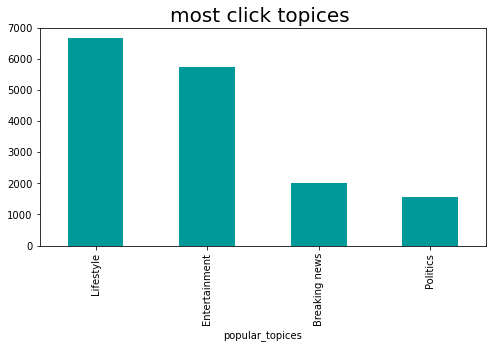

In [31]:
df.groupby('popular_topices')['clickbait'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(8,4),color=['#009999'])
plt.title("most click topices ",fontsize=20,)

# determine lable and target

In [10]:
x=df.headline
y=df.popular_topices

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

<AxesSubplot:>

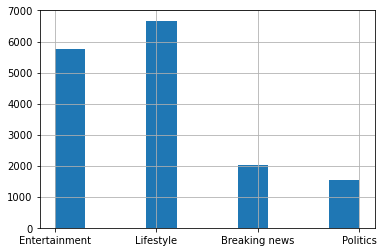

In [12]:
y.hist()

# count vectorizer 

In [13]:
# The first document-term matrix has default Count Vectorizer values - counts of unigrams
from sklearn.feature_extraction.text import CountVectorizer

cv1 = CountVectorizer(stop_words='english')

X_train_cv1 = cv1.fit_transform(X_train)
X_test_cv1  = cv1.transform(X_test)

cv2 = CountVectorizer(ngram_range=(1,2), binary=True, stop_words='english')

X_train_cv2 = cv2.fit_transform(X_train)
X_test_cv2  = cv2.transform(X_test)


#### * model eval doesn't give a logical result (it gives 1 for every exper) so we going with classification report

### logistic regression

In [14]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression()
lr.fit(X_train_cv1, y_train)
y_pred_cv1 = lr.predict(X_test_cv1)
target_names = ['Entertainment', 'Lifestyle', 'Breaking news','Politics']
m1=print(classification_report(y_test, y_pred_cv1, target_names=target_names))
m1

               precision    recall  f1-score   support

Entertainment       0.71      0.46      0.56       592
    Lifestyle       0.78      0.83      0.80      1755
Breaking news       0.77      0.88      0.82      1981
     Politics       0.66      0.38      0.48       472

     accuracy                           0.76      4800
    macro avg       0.73      0.64      0.67      4800
 weighted avg       0.75      0.76      0.75      4800



In [15]:
import joblib

filename = 'finalized_model.sav'
joblib.dump(lr, filename)

['finalized_model.sav']

In [16]:
lr = LogisticRegression()
lr.fit(X_train_cv2, y_train)
y_pred_cv2 = lr.predict(X_test_cv2)
target_names = ['Entertainment', 'Lifestyle', 'Breaking news','Politics']
m2=print(classification_report(y_test, y_pred_cv2, target_names=target_names))
m2

               precision    recall  f1-score   support

Entertainment       0.74      0.41      0.53       592
    Lifestyle       0.77      0.81      0.79      1755
Breaking news       0.73      0.89      0.80      1981
     Politics       0.71      0.32      0.44       472

     accuracy                           0.74      4800
    macro avg       0.74      0.61      0.64      4800
 weighted avg       0.74      0.74      0.73      4800



### Naive Bayes-Multinomial

In [17]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train_cv1, y_train)
y_pred_cv1_nb = mnb.predict(X_test_cv1)
target_names = ['Entertainment', 'Lifestyle', 'Breaking news','Politics']
m3=print(classification_report(y_test, y_pred_cv1_nb, target_names=target_names))
m3

               precision    recall  f1-score   support

Entertainment       0.75      0.28      0.41       592
    Lifestyle       0.76      0.80      0.78      1755
Breaking news       0.70      0.91      0.79      1981
     Politics       0.77      0.25      0.38       472

     accuracy                           0.73      4800
    macro avg       0.75      0.56      0.59      4800
 weighted avg       0.74      0.73      0.70      4800



In [18]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train_cv2, y_train)
y_pred_cv2_nb = mnb.predict(X_test_cv2)
target_names = ['Entertainment', 'Lifestyle', 'Breaking news','Politics']
m4=print(classification_report(y_test, y_pred_cv2_nb, target_names=target_names))
m4

               precision    recall  f1-score   support

Entertainment       0.81      0.19      0.31       592
    Lifestyle       0.75      0.79      0.77      1755
Breaking news       0.68      0.92      0.78      1981
     Politics       0.84      0.19      0.31       472

     accuracy                           0.71      4800
    macro avg       0.77      0.52      0.54      4800
 weighted avg       0.74      0.71      0.67      4800



### Naive Bayes-Bernoulli

In [19]:
# Fit the second Naive Bayes model
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(X_train_cv1, y_train)
y_pred_cv1_nb = bnb.predict(X_test_cv1)
target_names = ['Entertainment', 'Lifestyle', 'Breaking news','Politics']
m5=print(classification_report(y_test, y_pred_cv1_nb, target_names=target_names))
m5

               precision    recall  f1-score   support

Entertainment       0.80      0.10      0.18       592
    Lifestyle       0.74      0.79      0.76      1755
Breaking news       0.66      0.93      0.77      1981
     Politics       0.94      0.07      0.13       472

     accuracy                           0.69      4800
    macro avg       0.78      0.47      0.46      4800
 weighted avg       0.73      0.69      0.63      4800



In [20]:
bnb = BernoulliNB()
bnb.fit(X_train_cv2, y_train)
y_pred_cv2_nb = bnb.predict(X_test_cv2)
target_names = ['Entertainment', 'Lifestyle', 'Breaking news','Politics']
m6=print(classification_report(y_test, y_pred_cv2_nb, target_names=target_names))
m6

               precision    recall  f1-score   support

Entertainment       1.00      0.01      0.02       592
    Lifestyle       0.79      0.66      0.72      1755
Breaking news       0.57      0.96      0.72      1981
     Politics       0.00      0.00      0.00       472

     accuracy                           0.64      4800
    macro avg       0.59      0.41      0.36      4800
 weighted avg       0.65      0.64      0.56      4800



# TF-IDF

In [21]:
# Create TF-IDF versions of the Count Vectorizers created earlier in the exercise
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf1 = TfidfVectorizer(stop_words='english')
X_train_tfidf1 = tfidf1.fit_transform(X_train)
X_test_tfidf1  = tfidf1.transform(X_test)

tfidf2 = TfidfVectorizer(ngram_range=(1,2), binary=True, stop_words='english')
X_train_tfidf2 = tfidf2.fit_transform(X_train)
X_test_tfidf2  = tfidf2.transform(X_test)

### logistic regression

In [22]:
# Fit the first logistic regression on the TF-IDF data
lr.fit(X_train_tfidf1, y_train)
y_pred_tfidf1_lr = lr.predict(X_test_tfidf1)
target_names = ['Entertainment', 'Lifestyle', 'Breaking news','Politics']
m7=print(classification_report(y_test, y_pred_tfidf1_lr, target_names=target_names))
m7

               precision    recall  f1-score   support

Entertainment       0.81      0.33      0.47       592
    Lifestyle       0.75      0.83      0.79      1755
Breaking news       0.73      0.91      0.81      1981
     Politics       0.81      0.26      0.39       472

     accuracy                           0.74      4800
    macro avg       0.78      0.58      0.61      4800
 weighted avg       0.75      0.74      0.72      4800



In [23]:
# Fit the first logistic regression on the TF-IDF data
lr.fit(X_train_tfidf2, y_train)
y_pred_tfidf2_lr = lr.predict(X_test_tfidf2)
target_names = ['Entertainment', 'Lifestyle', 'Breaking news','Politics']
m8=print(classification_report(y_test, y_pred_tfidf2_lr, target_names=target_names))
m8

               precision    recall  f1-score   support

Entertainment       0.84      0.23      0.37       592
    Lifestyle       0.73      0.79      0.76      1755
Breaking news       0.68      0.91      0.78      1981
     Politics       0.83      0.18      0.30       472

     accuracy                           0.71      4800
    macro avg       0.77      0.53      0.55      4800
 weighted avg       0.73      0.71      0.67      4800



### Naive Bayes-Multinomial

In [24]:
mnb = MultinomialNB()
mnb.fit(X_train_tfidf1, y_train)
y_pred_tfidf1_nb = mnb.predict(X_test_tfidf1)
target_names = ['Entertainment', 'Lifestyle', 'Breaking news','Politics']
m9=print(classification_report(y_test, y_pred_tfidf1_nb, target_names=target_names))
m9

               precision    recall  f1-score   support

Entertainment       0.74      0.04      0.08       592
    Lifestyle       0.75      0.79      0.77      1755
Breaking news       0.65      0.95      0.77      1981
     Politics       0.95      0.04      0.07       472

     accuracy                           0.69      4800
    macro avg       0.77      0.45      0.42      4800
 weighted avg       0.72      0.69      0.62      4800



In [25]:
mnb = MultinomialNB()
mnb.fit(X_train_tfidf2, y_train)
y_pred_tfidf2_nb = mnb.predict(X_test_tfidf2)
target_names = ['Entertainment', 'Lifestyle', 'Breaking news','Politics']
m10=print(classification_report(y_test, y_pred_tfidf2_nb, target_names=target_names))
m10

               precision    recall  f1-score   support

Entertainment       0.83      0.03      0.05       592
    Lifestyle       0.75      0.75      0.75      1755
Breaking news       0.62      0.94      0.75      1981
     Politics       1.00      0.02      0.03       472

     accuracy                           0.67      4800
    macro avg       0.80      0.44      0.40      4800
 weighted avg       0.73      0.67      0.59      4800



### Naive Bayes-Bernoulli

In [26]:
# Fit the second Naive Bayes model
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(X_train_tfidf1, y_train)
y_pred_tfidf_nb = bnb.predict(X_test_tfidf1)
target_names = ['Entertainment', 'Lifestyle', 'Breaking news','Politics']
m11=print(classification_report(y_test, y_pred_tfidf_nb, target_names=target_names))
m11

               precision    recall  f1-score   support

Entertainment       0.80      0.10      0.18       592
    Lifestyle       0.74      0.79      0.76      1755
Breaking news       0.66      0.93      0.77      1981
     Politics       0.94      0.07      0.13       472

     accuracy                           0.69      4800
    macro avg       0.78      0.47      0.46      4800
 weighted avg       0.73      0.69      0.63      4800



In [27]:
bnb = BernoulliNB()
bnb.fit(X_train_tfidf2, y_train)
y_pred_tfidf2_nb = bnb.predict(X_test_tfidf2)
target_names = ['Entertainment', 'Lifestyle', 'Breaking news','Politics']
m12=print(classification_report(y_test, y_pred_tfidf2_nb, target_names=target_names))
m12

               precision    recall  f1-score   support

Entertainment       1.00      0.01      0.02       592
    Lifestyle       0.79      0.66      0.72      1755
Breaking news       0.57      0.96      0.72      1981
     Politics       0.00      0.00      0.00       472

     accuracy                           0.64      4800
    macro avg       0.59      0.41      0.36      4800
 weighted avg       0.65      0.64      0.56      4800



#### the best model is logistic regeression with count vectorize

In [ ]:
#(( If Disney Princesses Were From Florida ,U.S. Hits Record Number of New Covid Cases Twice in Same Week, U.S. on Sidelines as China and Other Nations Launch Trade Pact,Biden 2022 challenges revolve around Covid, Russia and dealing with Congress))

# test the model on unseen data

In [40]:
from keras.models import load_model
loaded_model = joblib.load('finalized_model.sav')

test = ['Biden 2022 challenges revolve around Covid, Russia and dealing with Congress'] 
test_vec = cv1.transform(test)
loaded_model.predict(test_vec)

# returns predicted class

array(['Politics'], dtype=object)